<a href="https://colab.research.google.com/github/trisha-shiny/E-mail-spam-detection/blob/main/1_Email_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas scikit-learn matplotlib

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("spam.csv", encoding='latin-1')[['v1','v2']]
data.columns = ['label', 'message']

In [4]:
data['label'] = data['label'].map({'ham':0, 'spam':1})

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

In [6]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [7]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [8]:
y_pred = model.predict(X_test_tfidf)

In [9]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.9668161434977578
Precision: 1.0
Recall: 0.7533333333333333


In [10]:
sample = ["Congratulations! You won a free iPhone. Click here.",
          "Hi John, let’s meet tomorrow at the office."]
sample_tfidf = vectorizer.transform(sample)
print("Predictions:", model.predict(sample_tfidf))

Predictions: [1 0]


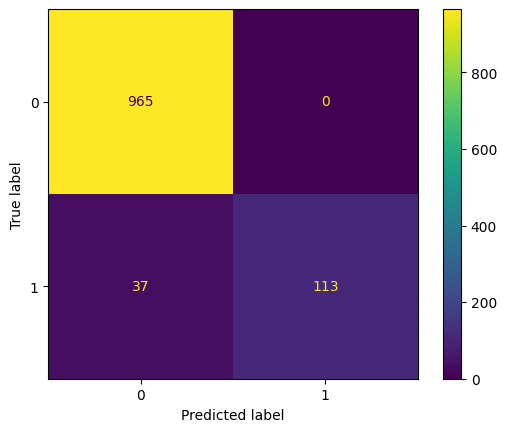

In [11]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()